Sample dataset

In [ ]:
import pandas as pd
# training dataset
pizza = {'diameter': [6,8,10,14,18],
         'n_topping':[2,1,0,2,0],
         'harga':[7,9,13,17.5,18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df



In [ ]:
# testing dataset
pizza = {'diameter': [8,9,11,16,12],
         'n_topping':[2,0,2,2,0],
         'harga':[11,8.5,15,18,11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

Preprocessing Dataset

In [7]:
import numpy as np

x_train = np.array(train_pizza_df[['diameter', 'n_topping']])
y_train = np.array(train_pizza_df['harga'])

print("x train",x_train)
print("y train",y_train)

x train [[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]
y train [ 7.   9.  13.  17.5 18. ]


In [ ]:
x_test = np.array(test_pizza_df[['diameter', 'n_topping']])
y_test = np.array(test_pizza_df['harga'])

print("x train",x_test)
print("y train",y_test)

Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('R2 Score ', r2_score(y_test, y_pred))

Polynomial Regression

In [11]:
# preprocessing Dataset
x_train = np.array(train_pizza_df['diameter']).reshape(-1,1)
y_train = np.array(train_pizza_df['harga'])

print("x train", x_train)
print("y train", y_train)

x train [[ 6]
 [ 8]
 [10]
 [14]
 [18]]
y train [ 7.   9.  13.  17.5 18. ]


Polynomial Regression : Quadratic

In [9]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_feature.fit_transform(x_train)

print('X train quadratic ' , x_train_quadratic)

X train quadratic  [[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]


Training Model

In [ ]:
model = LinearRegression()
model.fit(x_train_quadratic, y_train)

Visualisasi Model

In [ ]:
import matplotlib.pyplot as plt

x_vis = np.linspace(0,25,100).reshape(-1,1)
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis_quadratic = model.predict(x_vis_quadratic)

plt.scatter(x_train, y_pred)
plt.plot(x_vis, y_vis_quadratic,'-r')

plt.title("Perbandingan diameter dengan harga pizza")
plt.xlabel("Diameter (inch)")
plt.ylabel("Harga (dollar)")
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

Polynomial Regression : Quadratic vs Cubic

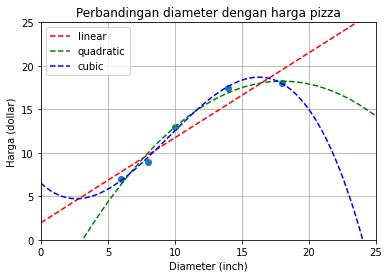

In [22]:
# Training Set
plt.scatter(x_train, y_train)

# Linear
model = LinearRegression()
model.fit(x_train, y_train)
x_vis = np.linspace(0,25,100).reshape(-1,1)
y_vis = model.predict(x_vis)
plt.plot(x_vis, y_vis,'--r',label='linear')

# Quadraatic
quadratic_feature = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_feature.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_quadratic, y_train)
x_vis_quadratic = quadratic_feature.transform(x_vis)
y_vis_q = model.predict(x_vis_quadratic)
plt.plot(x_vis, y_vis_q, '--g', label="quadratic")

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
x_train_cubic = cubic_feature.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_cubic, y_train)
x_vis_cubic = cubic_feature.transform(x_vis)
y_vis = model.predict(x_vis_cubic)
plt.plot(x_vis, y_vis, '--b', label="cubic")

plt.title("Perbandingan diameter dengan harga pizza")
plt.xlabel("Diameter (inch)")
plt.ylabel("Harga (dollar)")
plt.legend()
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()